In [82]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

**Preguntas**
* Diferencia entre np.zeros y np.empty
* 

# <span style="color:red"> Análisis de imagen media, varianza y derivada para los videos de ADENOMA con NBI and WL </span> 

## Análisis de la imágen promedio en NBI

In [83]:
#AL FIN PARA TODAS LAS IMAGENES ADENOMA FORMA

path = '/home/franklinsierra/Documentos/Biomedica/Experimentos/PolypDataset/adenoma/'
img_prom_adenomaNbi = []
for i in range (1,41):
    if i < 10:
        video = cv.VideoCapture(path + 'NBI0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_adenomaNbi.append(prom)
        
    else:
        video = cv.VideoCapture(path + 'NBI'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_adenomaNbi.append(prom)

print ("hay ", len( img_prom_adenomaNbi), "imagenes promedio de adenoma NBI")

hay  40 imagenes promedio de adenoma NBI


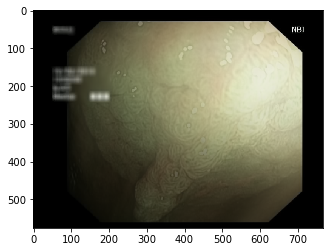

In [85]:
plt.imshow(img_prom_adenomaNbi[0])
plt.show()

In [4]:
#for i in range(1,40):
#    if i < 10:
#        cv.imwrite('NBI_prom_0'+str(i)+'.png',img_prom_adenomaNbi[i-1])
#    else:
#        cv.imwrite('NBI_prom_'+str(i)+'.png',img_prom_adenomaNbi[i-1])  

In [5]:
#cv.imwrite('NBI_prom_40.png',img_prom_adenomaNbi[39])

### Análisis de la imágen obtenida por varianza en NBI

In [6]:
img_var_adenomaNbi = []
for i in range(41):
    if i < 10:
        video = cv.VideoCapture(path + 'NBI0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_adenomaNbi[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_adenomaNbi.append(var)
    else:
        video = cv.VideoCapture(path + 'NBI'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_adenomaNbi[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_adenomaNbi.append(var)
        
    
print ("hay ", len( img_var_adenomaNbi), "imagenes de varianza de adenoma NBI")

hay  41 imagenes de varianza de adenoma NBI


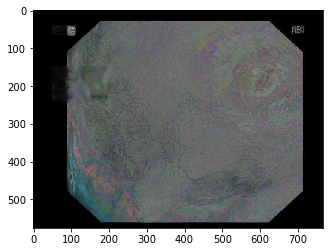

In [87]:
plt.imshow(img_var_adenomaNbi[1])
plt.show()

In [8]:
#for i in range(2,42):
#    if i < 10:
#        cv.imwrite('image_'+str(i-1)+'.png',img_var_adenomaNbi[i-1])
#    else:
#        cv.imwrite('image_'+str(i-1)+'.png',img_var_adenomaNbi[i-1])  

## Imágenes obtenidas al aplicar la convolución en la imagen promedio en NBI

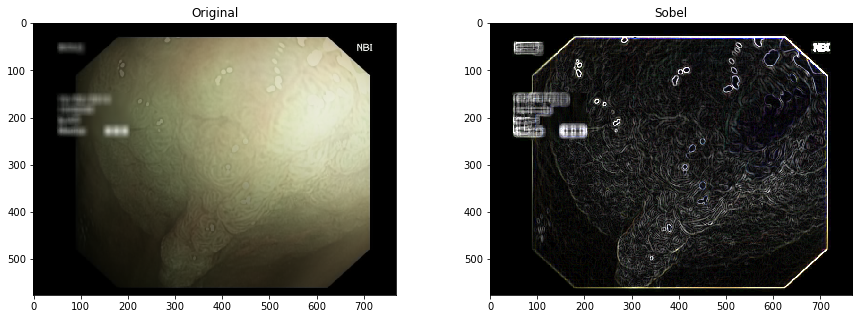

In [100]:
#src = cv.GaussianBlur(img_color, (3, 3), 0)
#gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
ddepth = cv.CV_16S
scale = 1
delta = 0
grad_x = cv.Sobel(img_prom_adenomaNbi[0], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img_prom_adenomaNbi[0], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)     
grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img_prom_adenomaNbi[0]),plt.title('Original')
plt.subplot(122),plt.imshow(grad),plt.title('Sobel')
plt.show()

In [10]:
img_der_adenomaNbi = []
for i in range(40):
    grad_x = cv.Sobel(img_prom_adenomaNbi[i], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img_prom_adenomaNbi[i], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)     
    grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)
    img_der_adenomaNbi.append(grad)
print("hay ", len(img_der_adenomaNbi), "imagenes derivadas adenoma Nbi")

hay  40 imagenes derivadas adenoma Nbi


In [11]:
#for i in range(1,41):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_der_adenomaNbi[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_der_adenomaNbi[i-1])  

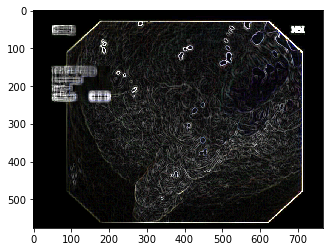

In [89]:
plt.imshow(img_der_adenomaNbi[0])
plt.show()

## Ahora imagen media de las de adenoma formato WL 

In [13]:
path = '/home/franklinsierra/Documentos/Biomedica/Experimentos/PolypDataset/adenoma/'
img_prom_adenomaWL = []
for i in range (1,41):
    if i < 10:
        video = cv.VideoCapture(path + 'WL0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_adenomaWL.append(prom)
        
    else:
        video = cv.VideoCapture(path + 'WL'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_adenomaWL.append(prom)

print ("hay ", len(img_prom_adenomaWL), "imagenes promedio de adenoma NBI")

hay  40 imagenes promedio de adenoma NBI


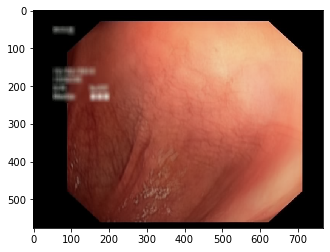

In [90]:
plt.imshow(img_prom_adenomaWL[0])
plt.show()

In [15]:
#for i in range(1,40):
#    if i < 10:
#        cv.imwrite('wLAdenoma_prom_0'+str(i)+'.png',img_prom_adenomaWL[i-1])
#    else:
#        cv.imwrite('wLAdenoma_prom_'+str(i)+'.png',img_prom_adenomaWL[i-1])  

In [16]:
#cv.imwrite('wLAdenoma_prom_40.png',img_prom_adenomaWL[39])

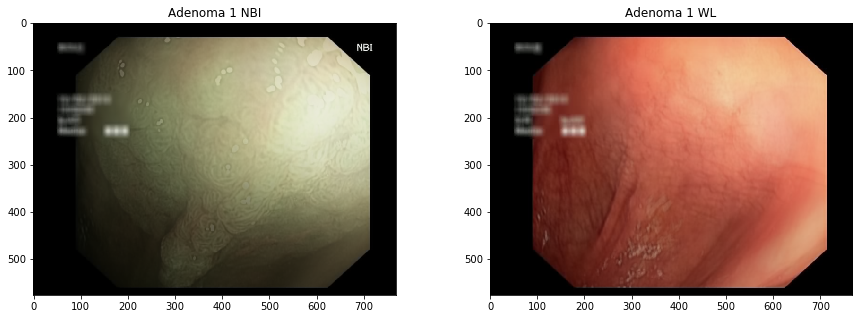

In [101]:
plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img_prom_adenomaNbi[0]),plt.title('Adenoma 1 NBI')
plt.subplot(122),plt.imshow(img_prom_adenomaWL[0]),plt.title('Adenoma 1 WL')
plt.show()

### Análisis de la imágen obtenida por varianza en WL

In [18]:
img_var_adenomaWl = []
for i in range(1,41):
    if i < 10:
        video = cv.VideoCapture(path + 'WL0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        diferencia = np.zeros(dimension)
        
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_adenomaWL[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_adenomaWl.append(var)
    else:
        video = cv.VideoCapture(path + 'WL'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_adenomaWL[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_adenomaWl.append(var)
        
    
print ("hay ", len( img_var_adenomaWl), "imagenes de varianza de adenoma WL")

hay  40 imagenes de varianza de adenoma WL


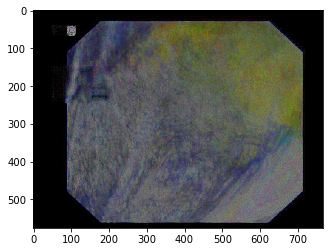

In [92]:
plt.imshow(img_var_adenomaWl[0])
plt.show()

In [20]:
#for i in range(1,41):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_var_adenomaWl[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_var_adenomaWl[i-1])  

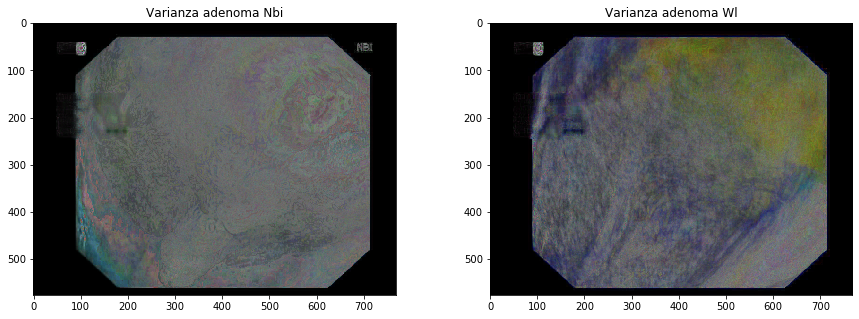

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_var_adenomaNbi[1]),plt.title("Varianza adenoma Nbi")
plt.subplot(122), plt.imshow(img_var_adenomaWl[0]), plt.title("Varianza adenoma Wl")
plt.show()

## Imágenes obtenidas al aplicar la convolución en las imágenes promedio WL

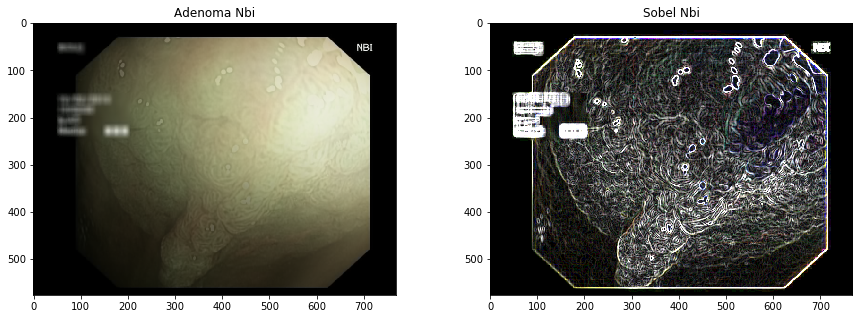

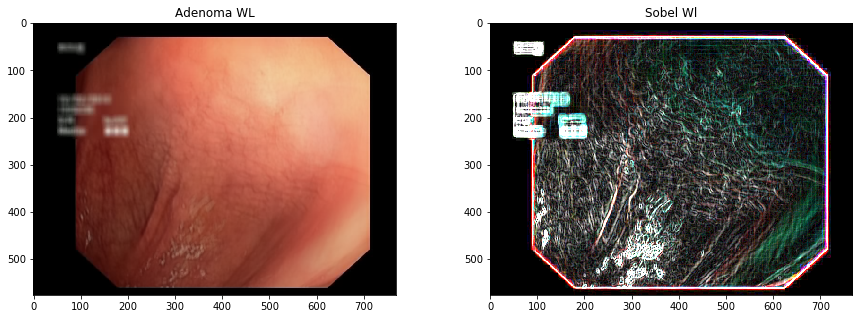

In [104]:
ddepth = cv.CV_16S
scale = 1
delta = 0

grad_x = cv.Sobel(img_prom_adenomaNbi[0], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img_prom_adenomaNbi[0], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)     
grad2 = cv.addWeighted(abs_grad_x, 5, abs_grad_y, 5, 0)

grad_x2 = cv.Sobel(img_prom_adenomaWL[0], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y2 = cv.Sobel(img_prom_adenomaWL[0], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
abs_grad_x2 = cv.convertScaleAbs(grad_x2)
abs_grad_y2 = cv.convertScaleAbs(grad_y2)     
grad2_1 = cv.addWeighted(abs_grad_x2, 5, abs_grad_y2, 5, 0)

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img_prom_adenomaNbi[0]),plt.title('Adenoma Nbi')
plt.subplot(122),plt.imshow(grad2),plt.title('Sobel Nbi')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121),plt.imshow(img_prom_adenomaWL[0]),plt.title('Adenoma WL')
plt.subplot(122),plt.imshow(grad2_1),plt.title('Sobel Wl')
plt.show()

In [23]:
img_der_adenomaWl = []
for i in range(40):
    grad_x = cv.Sobel(img_prom_adenomaWL[i], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img_prom_adenomaWL[i], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)     
    grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)
    img_der_adenomaWl.append(grad)
print("hay ", len(img_der_adenomaWl), "imagenes derivadas adenoma Wl")

hay  40 imagenes derivadas adenoma Wl


In [24]:
#for i in range(1,41):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_der_adenomaWl[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_der_adenomaWl[i-1]) 

## <span style="color:red">  Análisis de imagen media, varianza y derivada para los videos de HIPERPLASTICOS con NBI and WL</span>

## Análisis de la imágen promedio en NBI

In [25]:
path = '/home/franklinsierra/Documentos/Biomedica/Experimentos/PolypDataset/hyperplastic/'
img_prom_hypNbi = []
for i in range (1,22):
    if i < 10:
        video = cv.VideoCapture(path + 'NBI0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_hypNbi.append(prom)
        
    else:
        video = cv.VideoCapture(path + 'NBI'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_hypNbi.append(prom)

print ("hay ", len( img_prom_hypNbi), "imagenes promedio de adenoma hiperplastico NBI")

hay  21 imagenes promedio de adenoma hiperplastico NBI


In [26]:
#for i in range(1,22):
#    if i < 10:
#        cv.imwrite('NbiHplastico_prom_0'+str(i)+'.png',img_prom_hypNbi[i-1])
#    else:
#        cv.imwrite('NbiHplastico_prom_'+str(i)+'.png',img_prom_hypNbi[i-1])  

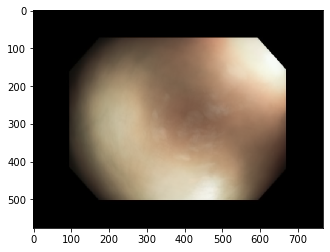

In [96]:
plt.imshow(img_prom_hypNbi[0])
plt.show()

### Análisis de la imágen obtenida por varianza en NBI

In [28]:
img_var_hypNbi = []
for i in range(1,22):
    if i < 10:
        video = cv.VideoCapture(path + 'NBI0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_hypNbi[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_hypNbi.append(var)
    else:
        video = cv.VideoCapture(path + 'NBI'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_hypNbi[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_hypNbi.append(var)
        
    
print ("hay ", len( img_var_hypNbi), "imagenes de varianza de hiperplastico NBI")

hay  21 imagenes de varianza de hiperplastico NBI


In [29]:
#for i in range(1,22):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_var_hypNbi[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_var_hypNbi[i-1])  

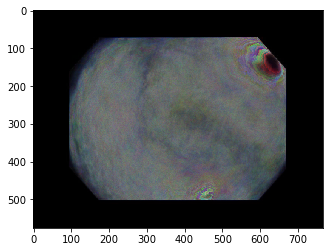

In [97]:
plt.imshow(img_var_hypNbi[0])
plt.show()

## Imágenes obtenidas al aplicar la convolución en las imágenes promedio Nbi

In [31]:
img_der_hypNbi = []
for i in range(21):
    grad_x = cv.Sobel(img_prom_hypNbi[i], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img_prom_hypNbi[i], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)     
    grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)
    img_der_hypNbi.append(grad)
print("hay ", len(img_der_hypNbi), "imagenes derivadas hiperplasticos Nbi")

hay  21 imagenes derivadas hiperplasticos Nbi


In [32]:
#for i in range(1,22):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_der_hypNbi[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_der_hypNbi[i-1]) 

## Análisis de la imágen promedio en WL

In [33]:
path = '/home/franklinsierra/Documentos/Biomedica/Experimentos/PolypDataset/hyperplastic/'
img_prom_hypWl = []
for i in range (1,22):
    if i < 10:
        video = cv.VideoCapture(path + 'WL0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_hypWl.append(prom)
        
    else:
        video = cv.VideoCapture(path + 'WL'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_hypWl.append(prom)

print ("hay ", len( img_prom_hypWl), "imagenes promedio de adenoma hiperplastico WL")

hay  21 imagenes promedio de adenoma hiperplastico WL


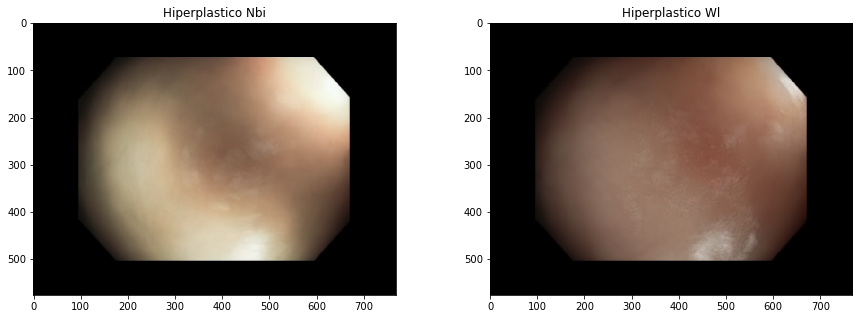

In [105]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_hypNbi[0]), plt.title("Hiperplastico Nbi")
plt.subplot(122), plt.imshow(img_prom_hypWl[0]), plt.title("Hiperplastico Wl")
plt.show()

## Análisis de la imágen varianza en WL

In [35]:
img_var_hypWl = []
for i in range(1,22):
    if i < 10:
        video = cv.VideoCapture(path + 'WL0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        diferencia = np.zeros(dimension)
        
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_hypWl[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_hypWl.append(var)
    else:
        video = cv.VideoCapture(path + 'WL'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_hypWl[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_hypWl.append(var)
        
    
print ("hay ", len( img_var_hypWl), "imagenes de varianza hiperplasticos WL")

hay  21 imagenes de varianza hiperplasticos WL


In [36]:
#for i in range(1,22):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_var_hypWl[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_var_hypWl[i-1])  

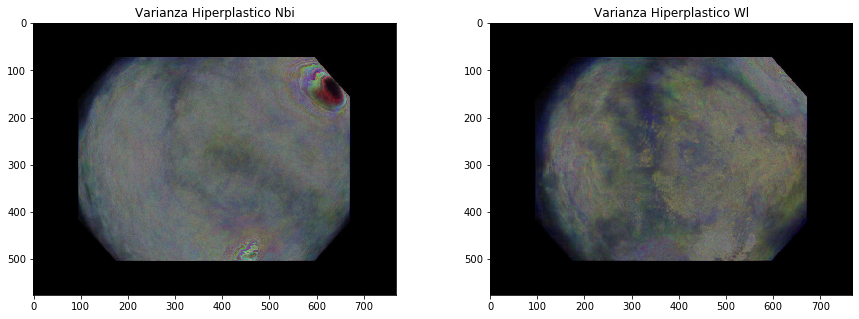

In [99]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_var_hypNbi[0]), plt.title("Varianza Hiperplastico Nbi")
plt.subplot(122), plt.imshow(img_var_hypWl[0]), plt.title("Varianza Hiperplastico Wl")
plt.show()

## Imágenes obtenidas al aplicar la convolución en las imágenes de varianza WL

### En imágen promedio (componentes en X, Y and both):

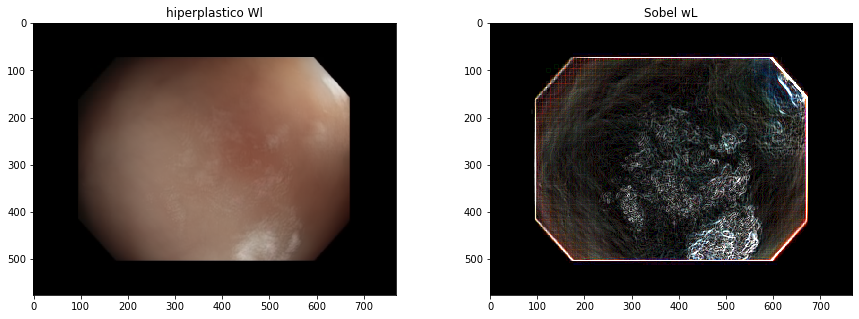

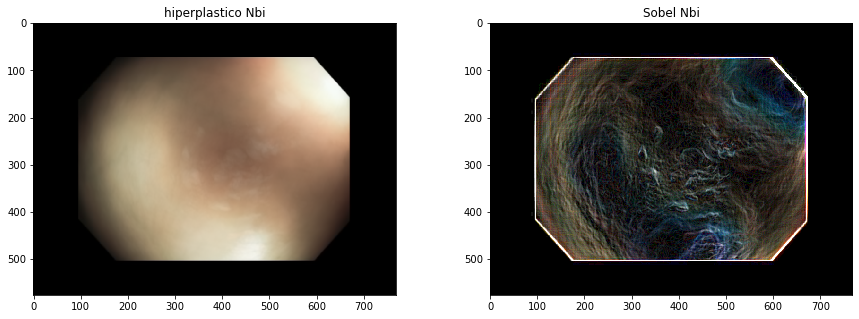

In [106]:
grad_x = cv.Sobel(img_prom_hypWl[0], ddepth, 1, 0, ksize = 3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img_prom_hypWl[0], ddepth, 0, 1, ksize = 3, scale=scale, delta= delta, borderType= cv.BORDER_DEFAULT)
grad_x2 = cv.Sobel(img_prom_hypNbi[0], ddepth, 1, 0, ksize = 3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
grad_y2 = cv.Sobel(img_prom_hypNbi[0], ddepth, 0, 1, ksize = 3, scale=scale, delta= delta, borderType= cv.BORDER_DEFAULT)

abs_gradx = cv.convertScaleAbs(grad_x)
abs_grady = cv.convertScaleAbs(grad_y)
grad3 = cv.addWeighted(abs_gradx, 5, abs_grady, 5, 0)

abs_gradx2 = cv.convertScaleAbs(grad_x2)
abs_grady2 = cv.convertScaleAbs(grad_y2)
grad3_2 = cv.addWeighted(abs_gradx2, 5, abs_grady2, 5, 0)

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_hypWl[0]), plt.title("hiperplastico Wl")
plt.subplot(122), plt.imshow(grad3), plt.title("Sobel wL")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_hypNbi[0]), plt.title("hiperplastico Nbi")
plt.subplot(122), plt.imshow(grad3_2), plt.title("Sobel Nbi")
plt.show()

In [40]:
img_der_hypWl = []
for i in range(21):
    grad_x = cv.Sobel(img_prom_hypWl[i], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img_prom_hypWl[i], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)     
    grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)
    img_der_hypWl.append(grad)
print("hay ", len(img_der_hypWl), "imagenes derivadas hiperplasticos Wl")

hay  21 imagenes derivadas hiperplasticos Wl


In [41]:
#for i in range(1,22):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_der_hypWl[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_der_hypWl[i-1]) 

## <span style="color:red">Análisis de imagen media, varianza y derivada para los videos de SERRATED con NBI and WL</span>

## Análisis de la imágen promedio en NBI

In [112]:
path = '/home/franklinsierra/Documentos/Biomedica/Experimentos/PolypDataset/serrated/'
img_prom_serratNbi = []
for i in range (1,16):
    if i < 10:
        video = cv.VideoCapture(path + 'NBI0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_serratNbi.append(prom)
        
    else:
        video = cv.VideoCapture(path + 'NBI'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_serratNbi.append(prom)

print ("hay ", len( img_prom_serratNbi), "imagenes promedio de adenoma SERRATED NBI")

hay  15 imagenes promedio de adenoma SERRATED NBI


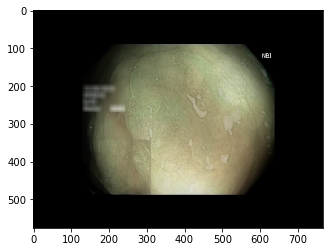

In [113]:
plt.imshow(img_prom_serratNbi[0])
plt.show()

In [44]:
#for i in range(1,16):
#    if i < 10:
#        cv.imwrite('NbiSerrated_prom_0'+str(i)+'.png',img_prom_serratNbi[i-1])
#    else:
#        cv.imwrite('NbiSerrated_prom_'+str(i)+'.png',img_prom_serratNbi[i-1])  

### imágen obtenida de la varianza en Nbi 

In [45]:
img_var_serratNbi = []
for i in range(1,16):
    if i < 10:
        video = cv.VideoCapture(path + 'NBI0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_serratNbi[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_serratNbi.append(var)
    else:
        video = cv.VideoCapture(path + 'NBI'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_serratNbi[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_serratNbi.append(var)
        
    
print ("hay ", len( img_var_serratNbi), "imagenes de varianza de serrated NBI")

hay  15 imagenes de varianza de serrated NBI


In [46]:
#for i in range(1,16):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_var_serratNbi[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_var_serratNbi[i-1])  

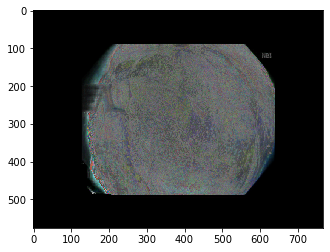

In [114]:
plt.imshow(img_var_serratNbi[0])
plt.show()

## Imágenes obtenidas al aplicar la convolución en las imágenes de varianza Nbi

### En imágen promedio (componentes en X, Y and both):

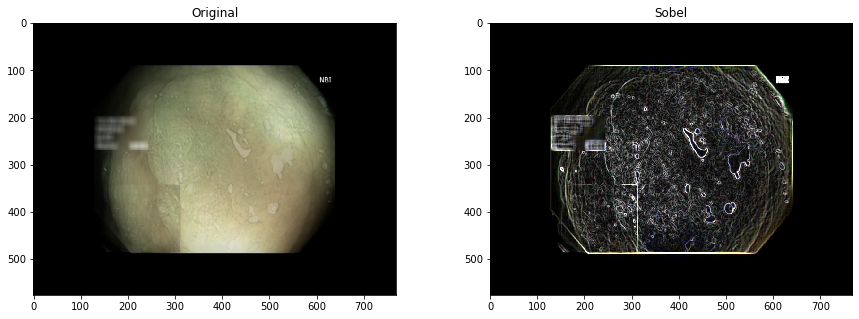

In [116]:
ddepth = cv.CV_16S
scale = 1
delta = 0
grad_x = cv.Sobel(img_prom_serratNbi[0], ddepth,  1, 0, ksize = 3, scale = scale, delta = delta, borderType = cv.BORDER_DEFAULT )
grad_y = cv.Sobel(img_prom_serratNbi[0], ddepth,  0, 1, ksize = 3, scale = scale, delta = delta, borderType = cv.BORDER_DEFAULT)

abs_grad_x = cv.convertScaleAbs(grad_x)
abs_grad_y = cv.convertScaleAbs(grad_y)     
grad4 = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_serratNbi[0]), plt.title("Original")
plt.subplot(122), plt.imshow(grad4), plt.title("Sobel")
plt.show()

In [49]:
img_der_serratNbi = []
for i in range(15):
    grad_x = cv.Sobel(img_prom_serratNbi[i], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img_prom_serratNbi[i], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)     
    grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)
    img_der_serratNbi.append(grad)
print("hay ", len(img_der_serratNbi), "imagenes derivadas serrated Nbi")

hay  15 imagenes derivadas serrated Nbi


In [50]:
#for i in range(1,16):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_der_serratNbi[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_der_serratNbi[i-1]) 

## Análisis de la imágen promedio en WL

In [51]:
path = '/home/franklinsierra/Documentos/Biomedica/Experimentos/PolypDataset/serrated/'
img_prom_serratWl = []
for i in range (1,16):
    if i < 10:
        video = cv.VideoCapture(path + 'WL0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_serratWl.append(prom)
        
    else:
        video = cv.VideoCapture(path + 'WL'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        dimension = frames[1].shape
        
        suma = np.zeros(dimension)
        for j in range(len(frames)):
            suma = suma + frames[j]               
    
    
        prom = suma/len(frames)
        prom = prom.astype(np.uint8)
        img_prom_serratWl.append(prom)

print ("hay ", len( img_prom_serratWl), "imagenes promedio de adenoma SERRATED WL")

hay  15 imagenes promedio de adenoma SERRATED WL


In [52]:
#for i in range(1,16):
#    if i < 10:
#        cv.imwrite('wLSerrated_prom_0'+str(i)+'.png',img_prom_serratWl[i-1])
#    else:
#        cv.imwrite('wLSerrated_prom_'+str(i)+'.png',img_prom_serratWl[i-1])  

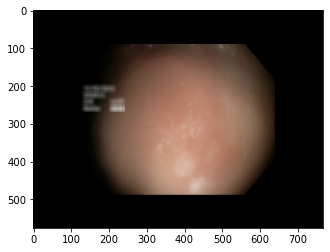

In [117]:
plt.imshow(img_prom_serratWl[0])
plt.show()

### Imágen obtenida por varianza en WL

In [54]:
img_var_serratWl = []
for i in range(1,16):
    if i < 10:
        video = cv.VideoCapture(path + 'NBI0'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_serratWl[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_serratWl.append(var)
    else:
        video = cv.VideoCapture(path + 'NBI'+ str(i)+'.mp4')
        frames = [cv.cvtColor(video.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(video.get(cv.CAP_PROP_FRAME_COUNT)))] #leo todos los frames
        
        diferencia = np.zeros(dimension)
        for j in range(len(frames)):
            diferencia = diferencia + pow(frames[j] - img_prom_serratWl[i-1],2)               
    
    
        var = diferencia/(len(frames)-1)
        var = var.astype(np.uint8)
        var = cv.cvtColor(var, cv.COLOR_BGR2RGB)
        img_var_serratWl.append(var)
        
    
print ("hay ", len( img_var_serratWl), "imagenes de varianza de serrated Wl")

hay  15 imagenes de varianza de serrated Wl


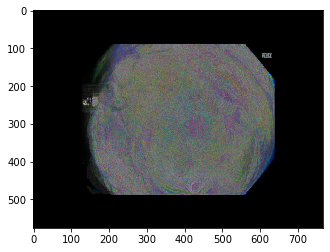

In [118]:
plt.imshow(img_var_serratWl[0])
plt.show()

In [56]:
#for i in range(1,16):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_var_serratWl[i-1])
#    else:
#       cv.imwrite('image_'+str(i)+'.png',img_var_serratWl[i-1])  

## Imágenes obtenidas al aplicar la convolución en las promedio WL

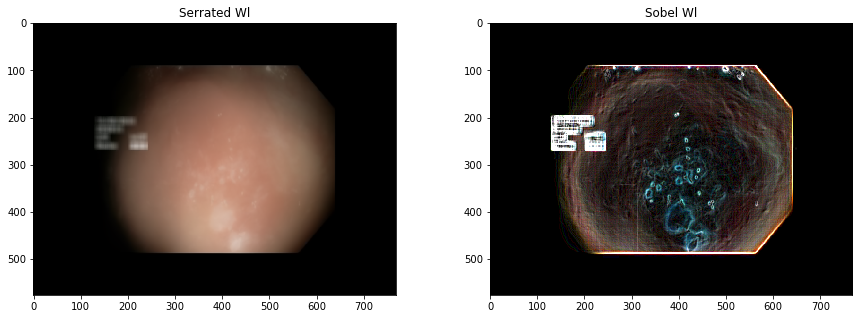

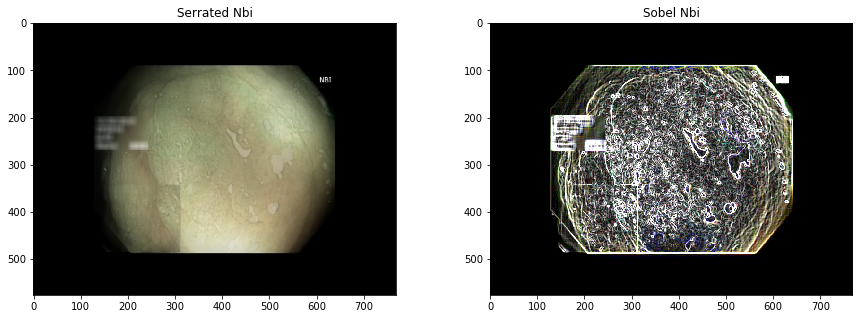

In [121]:
ddepth = cv.CV_16S
scale = 1
delta = 0

grad_x = cv.Sobel(img_prom_serratWl[0], ddepth, 1, 0, ksize = 3, scale = scale, borderType = cv.BORDER_DEFAULT)
grad_y = cv.Sobel(img_prom_serratWl[0], ddepth, 0, 1, ksize = 3, scale = scale, borderType = cv.BORDER_DEFAULT)
grad_x2 = cv.Sobel(img_prom_serratNbi[0], ddepth, 1, 0, ksize = 3, scale = scale, borderType = cv.BORDER_DEFAULT)
grad_y2 = cv.Sobel(img_prom_serratNbi[0], ddepth, 0, 1, ksize = 3, scale = scale, borderType = cv.BORDER_DEFAULT)


abs_x = cv.convertScaleAbs(grad_x)
abs_y = cv.convertScaleAbs(grad_y)
grad5 = cv.addWeighted(abs_x, 5, abs_y, 5, 0)

abs_x2 = cv.convertScaleAbs(grad_x2)
abs_y2 = cv.convertScaleAbs(grad_y2)
grad5_2 = cv.addWeighted(abs_x2, 5, abs_y2, 5, 0)

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_serratWl[0]), plt.title("Serrated Wl")
plt.subplot(122), plt.imshow(grad5), plt.title("Sobel Wl")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_serratNbi[0]), plt.title("Serrated Nbi")
plt.subplot(122), plt.imshow(grad5_2), plt.title("Sobel Nbi")
plt.show()

In [58]:
img_der_serratWl = []
for i in range(15):
    grad_x = cv.Sobel(img_prom_serratWl[i], ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(img_prom_serratWl[i], ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)     
    grad = cv.addWeighted(abs_grad_x, 2, abs_grad_y, 2, 0)
    img_der_serratWl.append(grad)
print("hay ", len(img_der_serratWl), "imagenes derivadas serrated Wl")

hay  15 imagenes derivadas serrated Wl


In [59]:
#for i in range(1,16):
#    if i < 10:
#        cv.imwrite('image_'+str(i)+'.png',img_der_serratWl[i-1])
#    else:
#        cv.imwrite('image_'+str(i)+'.png',img_der_serratWl[i-1]) 

# Imagenes para la presentacion

## Imagenes para Adenoma NBI

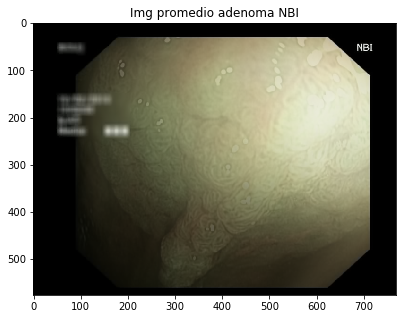

In [124]:
plt.figure(figsize=(15,5))
plt.imshow(img_prom_adenomaNbi[0])
plt.title("Img promedio adenoma NBI")
plt.show()

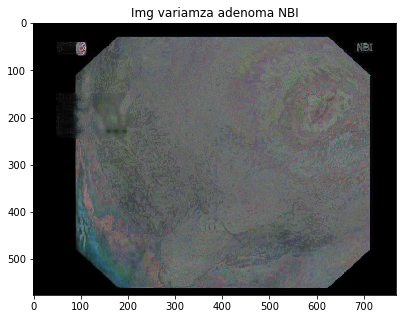

In [125]:
plt.figure(figsize=(15,5))
plt.imshow(img_var_adenomaNbi[1])
plt.title("Img variamza adenoma NBI")
plt.show()

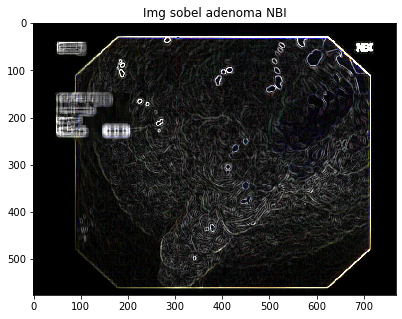

In [126]:
plt.figure(figsize=(15,5))
plt.imshow(img_der_adenomaNbi[0])
plt.title("Img sobel adenoma NBI")
plt.show()

## Imágenes para Adenoma WL

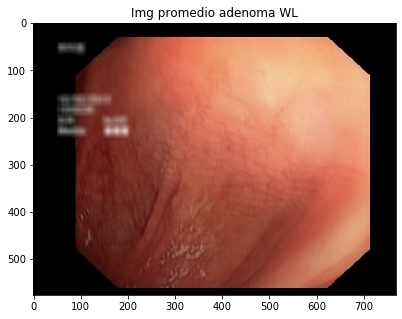

In [127]:
plt.figure(figsize=(15,5))
plt.imshow(img_prom_adenomaWL[0])
plt.title("Img promedio adenoma WL")
plt.show()

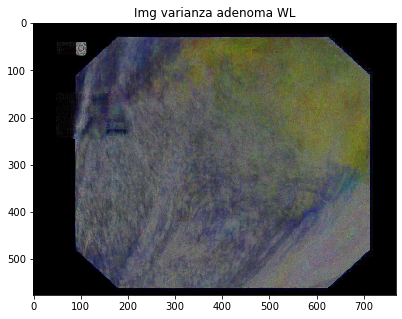

In [128]:
plt.figure(figsize=(15,5))
plt.imshow(img_var_adenomaWl[0])
plt.title("Img varianza adenoma WL")
plt.show()

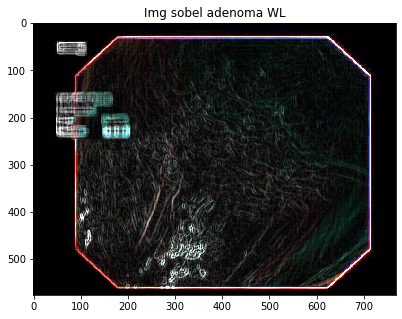

In [129]:
plt.figure(figsize=(15,5))
plt.imshow(img_der_adenomaWl[0])
plt.title("Img sobel adenoma WL")
plt.show()

## Imágenes para Hiperplastico NBI

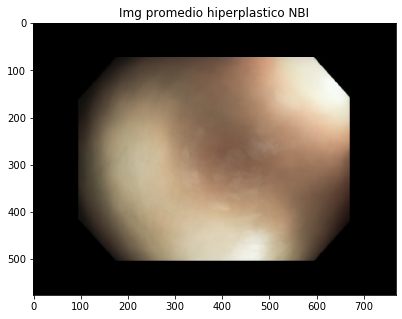

In [130]:
plt.figure(figsize=(15,5))
plt.imshow(img_prom_hypNbi[0])
plt.title("Img promedio hiperplastico NBI")
plt.show()

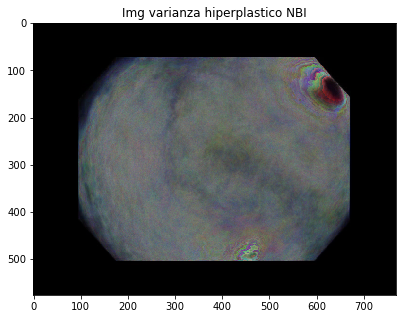

In [131]:
plt.figure(figsize=(15,5))
plt.imshow(img_var_hypNbi[0])
plt.title("Img varianza hiperplastico NBI")
plt.show()

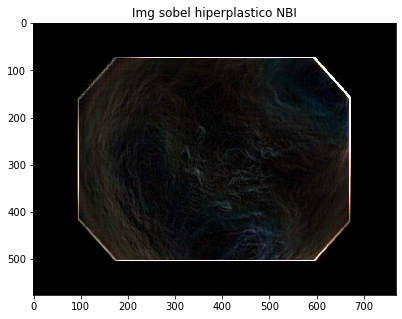

In [132]:
plt.figure(figsize=(15,5))
plt.imshow(img_der_hypNbi[0])
plt.title("Img sobel hiperplastico NBI")
plt.show()

## Para hiperplastico WL

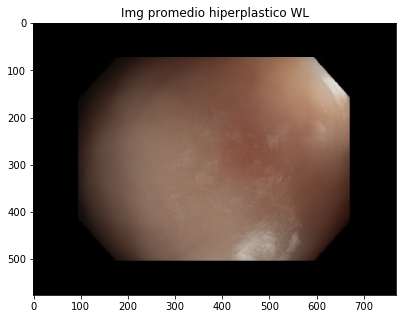

In [133]:
plt.figure(figsize=(15,5))
plt.imshow(img_prom_hypWl[0])
plt.title("Img promedio hiperplastico WL")
plt.show()

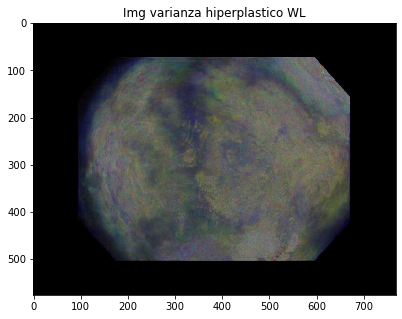

In [134]:
plt.figure(figsize=(15,5))
plt.imshow(img_var_hypWl[0])
plt.title("Img varianza hiperplastico WL")
plt.show()

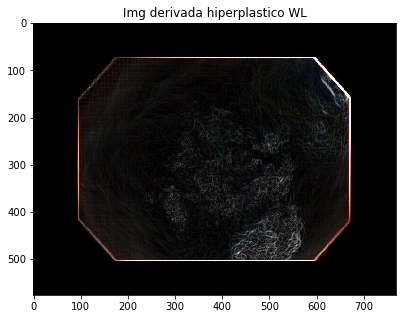

In [135]:
plt.figure(figsize=(15,5))
plt.imshow(img_der_hypWl[0])
plt.title("Img derivada hiperplastico WL")
plt.show()

## Para serrated NBI

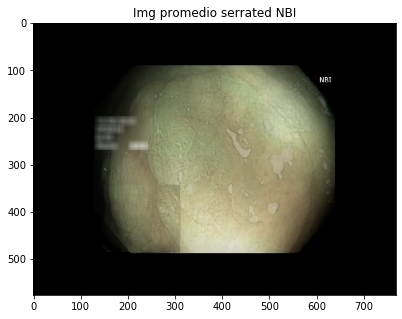

In [136]:
plt.figure(figsize=(15,5))
plt.imshow(img_prom_serratNbi[0])
plt.title("Img promedio serrated NBI")
plt.show()

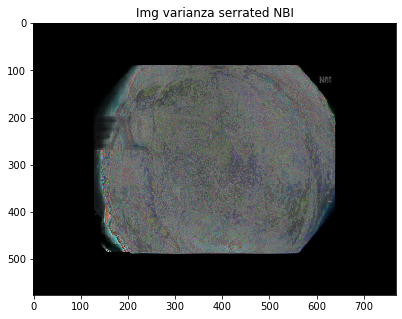

In [137]:
plt.figure(figsize=(15,5))
plt.imshow(img_var_serratNbi[0])
plt.title("Img varianza serrated NBI")
plt.show()

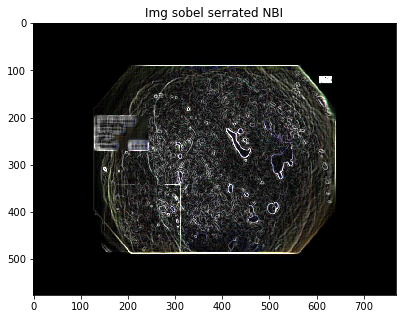

In [138]:
plt.figure(figsize=(15,5))
plt.imshow(img_der_serratNbi[0])
plt.title("Img sobel serrated NBI")
plt.show()

## Para serrated WL

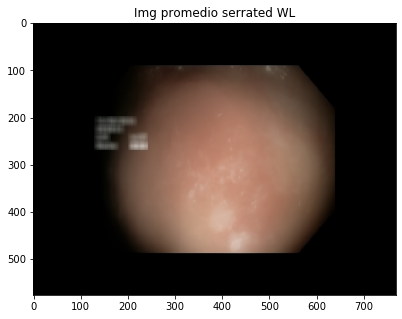

In [139]:
plt.figure(figsize=(15,5))
plt.imshow(img_prom_serratWl[0])
plt.title("Img promedio serrated WL")
plt.show()

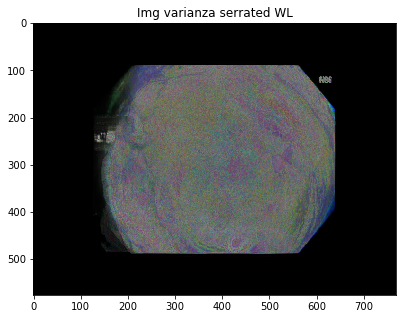

In [140]:
plt.figure(figsize=(15,5))
plt.imshow(img_var_serratWl[0])
plt.title("Img varianza serrated WL")
plt.show()

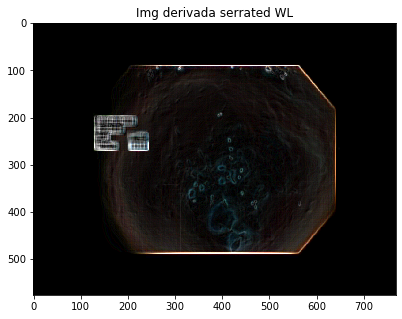

In [141]:
plt.figure(figsize=(15,5))
plt.imshow(img_der_serratWl[0])
plt.title("Img derivada serrated WL")
plt.show()

## Compilacion de adenoma 

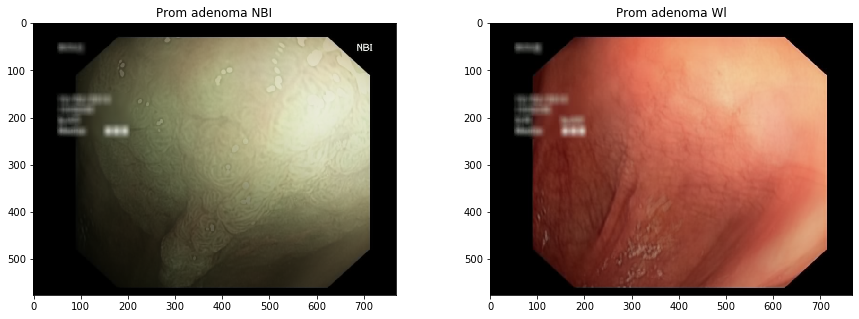

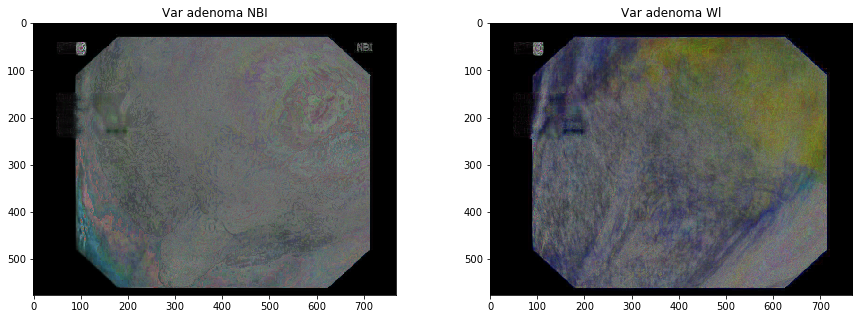

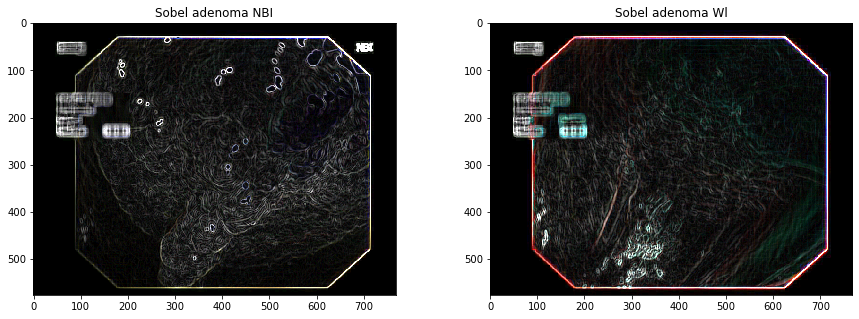

In [142]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_adenomaNbi[0]), plt.title("Prom adenoma NBI")
plt.subplot(122), plt.imshow(img_prom_adenomaWL[0]), plt.title("Prom adenoma Wl")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_var_adenomaNbi[1]), plt.title("Var adenoma NBI")
plt.subplot(122), plt.imshow(img_var_adenomaWl[0]), plt.title("Var adenoma Wl")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_der_adenomaNbi[0]), plt.title("Sobel adenoma NBI")
plt.subplot(122), plt.imshow(img_der_adenomaWl[0]), plt.title("Sobel adenoma Wl")
plt.show()

## Compilacion de hiperplastico

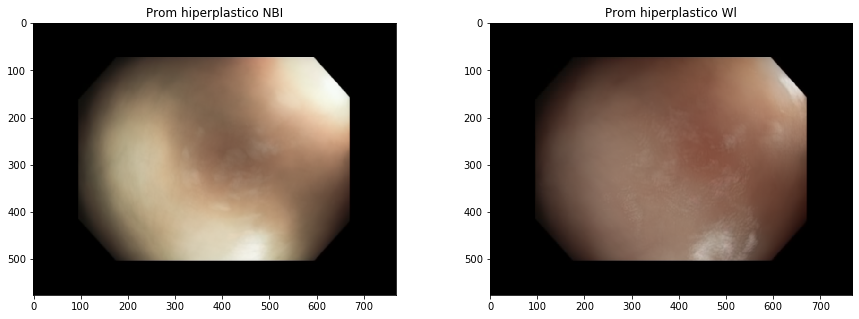

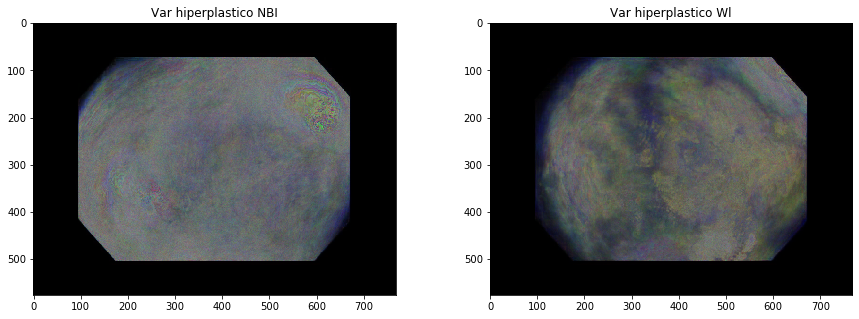

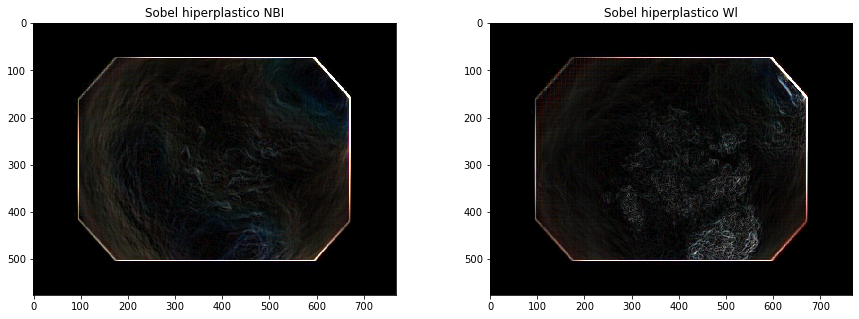

In [143]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_hypNbi[0]), plt.title("Prom hiperplastico NBI")
plt.subplot(122), plt.imshow(img_prom_hypWl[0]), plt.title("Prom hiperplastico Wl")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_var_hypNbi[1]), plt.title("Var hiperplastico NBI")
plt.subplot(122), plt.imshow(img_var_hypWl[0]), plt.title("Var hiperplastico Wl")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_der_hypNbi[0]), plt.title("Sobel hiperplastico NBI")
plt.subplot(122), plt.imshow(img_der_hypWl[0]), plt.title("Sobel hiperplastico Wl")
plt.show()

## Compilacion de serrated

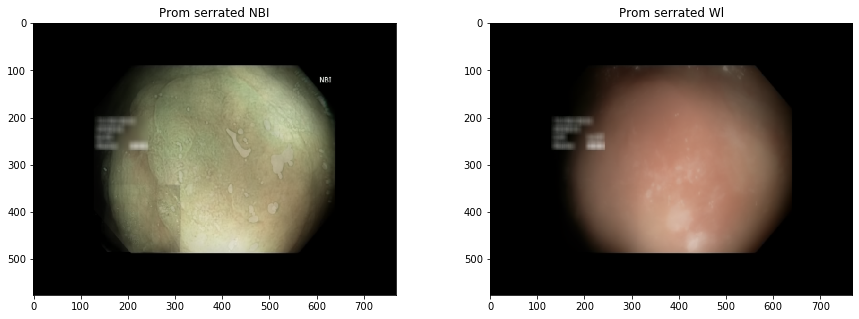

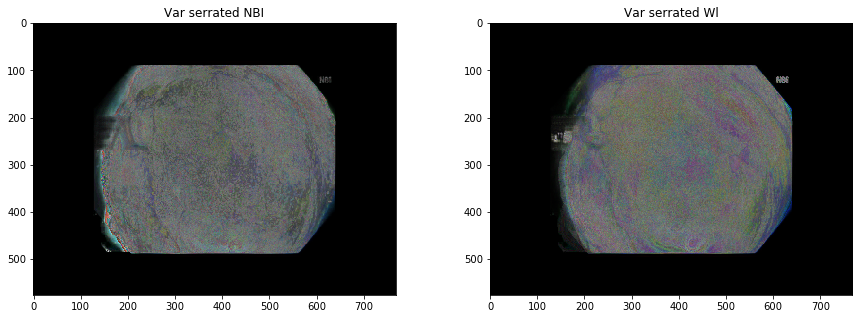

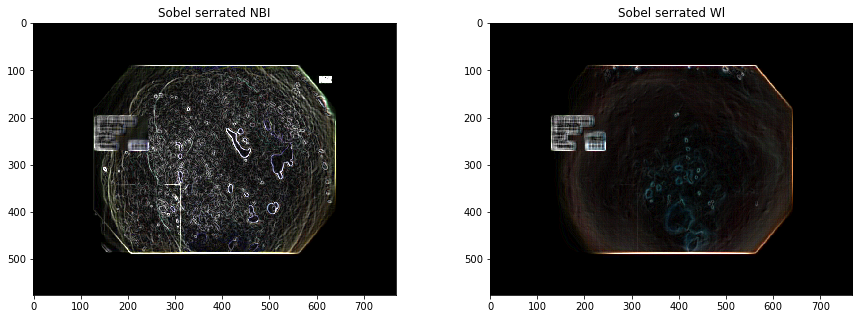

In [144]:
plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_prom_serratNbi[0]), plt.title("Prom serrated NBI")
plt.subplot(122), plt.imshow(img_prom_serratWl[0]), plt.title("Prom serrated Wl")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_var_serratNbi[0]), plt.title("Var serrated NBI")
plt.subplot(122), plt.imshow(img_var_serratWl[0]), plt.title("Var serrated Wl")
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(121), plt.imshow(img_der_serratNbi[0]), plt.title("Sobel serrated NBI")
plt.subplot(122), plt.imshow(img_der_serratWl[0]), plt.title("Sobel serrated Wl")
plt.show()